<a href="https://colab.research.google.com/github/srajabhoj/Telecom-Churn-Case-Study/blob/master/Telecom_Churn_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Telecom Churn Case Study**

## **Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer


# Modeling
# import required libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import Lasso
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/

Importing libraries for google drive

In [ ]:
# Ignore
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Authenticating user for google drive

In [ ]:
# Ignore
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
gdrive = GoogleDrive(gauth)

Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


## **Import and Read data file from google drive**

In [ ]:
# Ignore
link="https://drive.google.com/open?id=1SWnADIda31mVFevFcfkGtcgBHTKKI94J"
fluff, id = link.split('=')
downloaded = gdrive.CreateFile({'id':id}) 
downloaded.GetContentFile('telecom_churn_data.csv')  
teledf = pd.read_csv('telecom_churn_data.csv')

In [ ]:
teledf.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [ ]:
null_per=round((teledf.isnull().sum()/len(teledf))*100,2)

In [ ]:
# null_per.to_csv("Telecom Field Analysis with null data.csv", sep='\t', encoding='utf-8')
# !cp "Telecom Field Analysis with null data.csv" drive/My\ Drive/

In [ ]:
null_per[null_per>70].index.values

array(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'fb_user_9'], dtype=object)

In [ ]:
teledf['max_rech_data_6'].head(5)

0    252.0
1      NaN
2      NaN
3      NaN
4     56.0
Name: max_rech_data_6, dtype: float64

## **Find High Value Customers**

total_rech_data is column with number of recharges done by user in month, while analysis its found that it has null values for 0 recharges subsequenty av_rech_amt_data column also has null values for 0 so we can impute null values to 0

In [ ]:
# total_rech_data impute to 0
teledf['total_rech_data_6'] = teledf['total_rech_data_6'].fillna(0)
teledf['total_rech_data_7'] = teledf['total_rech_data_7'].fillna(0)
teledf['total_rech_data_8'] = teledf['total_rech_data_8'].fillna(0)
teledf['total_rech_data_9'] = teledf['total_rech_data_9'].fillna(0)
# av_rech_amt_data impute to 0
teledf['av_rech_amt_data_6'] = teledf['av_rech_amt_data_6'].fillna(0)
teledf['av_rech_amt_data_7'] = teledf['av_rech_amt_data_7'].fillna(0)
teledf['av_rech_amt_data_8'] = teledf['av_rech_amt_data_8'].fillna(0)
teledf['av_rech_amt_data_9'] = teledf['av_rech_amt_data_9'].fillna(0)

To calculate total user's spending over internet we will need to multily total number of recharges done by user for internet with average amount it spend on recharge, we will create new column **total_rech_amt_data** for the same

In [ ]:
teledf['total_rech_amt_data_6'] = teledf['total_rech_data_6'] * teledf['av_rech_amt_data_6']
teledf['total_rech_amt_data_7'] = teledf['total_rech_data_7'] * teledf['av_rech_amt_data_7']
teledf['total_rech_amt_data_8'] = teledf['total_rech_data_8'] * teledf['av_rech_amt_data_8']
teledf['total_rech_amt_data_9'] = teledf['total_rech_data_9'] * teledf['av_rech_amt_data_9']

To find total spending of user over telecom company by user we will need to calculate **total_amt_spent** column by adding total_rech_amt_data and total_rech_amt (calling expenses).

In [ ]:
teledf["total_amt_spent_6"]=teledf['total_rech_amt_data_6']+teledf['total_rech_amt_6']
teledf["total_amt_spent_7"]=teledf['total_rech_amt_data_7']+teledf['total_rech_amt_7']
teledf["total_amt_spent_8"]=teledf['total_rech_amt_data_8']+teledf['total_rech_amt_8']
teledf["total_amt_spent_9"]=teledf['total_rech_amt_data_9']+teledf['total_rech_amt_9']

In [ ]:
teledf["total_amt_spent_6_7"]=teledf["total_amt_spent_6"]+teledf["total_amt_spent_7"]
teledf["av_amt_spent_6_7"]=teledf["total_amt_spent_6_7"]/2

In [ ]:
_70th_percentile_amt_spent = teledf["av_amt_spent_6_7"].quantile(0.70)
_70th_percentile_amt_spent
high_val_cust_df=teledf[(teledf["av_amt_spent_6_7"] >= _70th_percentile_amt_spent)]

In [ ]:
high_val_cust_df_copy=high_val_cust_df.copy()
high_val_cust_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_amt_spent_6,total_amt_spent_7,total_amt_spent_8,total_amt_spent_9,total_amt_spent_6_7,av_amt_spent_6_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4

In [ ]:
# high_val_cust_df=high_val_cust_df_copy.copy()

## **Null Value Treatment**

Analysis Sheet

https://docs.google.com/spreadsheets/d/1TcAo35rf-CwMpTeUdOwzrCmtwCb2QyrWw1UffIRmBlw/edit#gid=539672414

In [ ]:
null_per=round((high_val_cust_df.isnull().sum()/len(high_val_cust_df))*100,2)
null_per

mobile_number          0.00
circle_id              0.00
loc_og_t2o_mou         0.75
std_og_t2o_mou         0.75
loc_ic_t2o_mou         0.75
                       ... 
total_amt_spent_7      0.00
total_amt_spent_8      0.00
total_amt_spent_9      0.00
total_amt_spent_6_7    0.00
av_amt_spent_6_7       0.00
Length: 236, dtype: float64

In [ ]:
null_per[null_per>45].index.values

array(['date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_8', 'count_rech_3g_9',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_8', 'arpu_2g_9',
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_8', 'fb_user_9'],
      dtype=object)

In [ ]:
high_val_cust_df.info(verbose=1);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 236 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [ ]:
len(high_val_cust_df)

30001

In [ ]:
# null_per.to_csv("hvc_null.csv", sep='\t', encoding='utf-8')
# !cp "hvc_null.csv" drive/My\ Drive/

In [ ]:
col_names_null_0_10=null_per[(null_per>0) & (null_per<10)].index.values
num_cols_impute=high_val_cust_df[col_names_null_0_10].select_dtypes(include ='float64')
num_col_names_impute=num_cols_impute.columns.values

**Iterative imputer from fancy imputer**

In [ ]:
high_val_cust_df[num_col_names_impute]=IterativeImputer(random_state=0).fit_transform(num_cols_impute)
high_val_cust_df.head()

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_amt_spent_6,total_amt_spent_7,total_amt_spent_8,total_amt_spent_9,total_amt_spent_6_7,av_amt_spent_6_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,265.8313,273.185341,0.00,225.578662,380.116063,382.691135,0.00,321.437929,9.513192,1.894061,0.00,1.201817,28.139846,20.550231,0.00,16.005901,86.047855,87.236138,0.00,77.895539,166.264602,165.981024,0.00,153.247356,6.461674,6.53995,0.00,6.151031,1.573487,1.247615,0.00,1.263028,258.780265,259.762925,0.00,237.298944,168.953293,177.407

**Imputation Checkpoint**<br>
Copying after imputing

In [ ]:
#Imputation Checkpoint
#Copying after imputing
imputed_copy=high_val_cust_df.copy()

In [ ]:
# high_val_cust_df=imputed_copy.copy()

In [ ]:
null_per=round((high_val_cust_df.isnull().sum()/len(high_val_cust_df))*100,2)

In [ ]:
high_null_columns=null_per[null_per>10].index.values
high_null_columns

array(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'], dtype=object)

In [ ]:
high_val_cust_df=high_val_cust_df.drop(high_null_columns,axis=1)

In [ ]:
high_val_cust_df.shape

(30001, 204)

In [ ]:
null_per=round((high_val_cust_df.isnull().sum()/len(high_val_cust_df))*100,2)
null_per[null_per>0]

last_date_of_month_7    0.09
last_date_of_month_8    0.55
last_date_of_month_9    1.22
date_of_last_rech_6     0.24
date_of_last_rech_7     0.33
date_of_last_rech_8     1.94
date_of_last_rech_9     2.72
dtype: float64

In [ ]:
null_per[null_per>0]
len(high_val_cust_df[high_val_cust_df["date_of_last_rech_9"].isnull()])

815

###Removing unncessary Columns

Column circle_id has only one value for entire data 109 so simply keeping it doesn't makes any difference so dropping it.

In [ ]:
high_val_cust_df=high_val_cust_df.drop(['circle_id'],axis=1)

Columns 
- loc_og_t2o_mou	
- std_og_t2o_mou	
- loc_ic_t2o_mou

are having only value 0 entirly, so no use of these columns.

In [ ]:
high_val_cust_df=high_val_cust_df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)

Columns
- std_og_t2c_mou_6
- std_og_t2c_mou_7
-	std_og_t2c_mou_8
-	std_og_t2c_mou_9

are having only value 0 entirly, so no use of these columns.

In [ ]:
high_val_cust_df=high_val_cust_df.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9'],axis=1)

**Checkpoint**<br>
data with last date of month

In [ ]:
# data with last date of month
df_with_last_date_of_month=high_val_cust_df.copy()

In [ ]:
# high_val_cust_df=df_with_last_date_of_month.copy()

In [ ]:
high_val_cust_df.columns[high_val_cust_df.nunique() <= 1]

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

Columns
- last_date_of_month_6, 
- last_date_of_month_7, 
- last_date_of_month_8,
- last_date_of_month_9, 
- std_ic_t2o_mou_6, 
- std_ic_t2o_mou_7,
- std_ic_t2o_mou_8, 
- std_ic_t2o_mou_9

have constant values so can be dropped

In [ ]:
high_val_cust_df=high_val_cust_df.drop(high_val_cust_df.columns[high_val_cust_df.nunique() <= 1].values, axis=1)

**Check Point**<br>
data after removing unnecessary columns

In [ ]:
data_non_constant_values=high_val_cust_df.copy()

In [ ]:
# high_val_cust_df=data_non_constant_values.copy()

### Derive value out of date columns and remove dates

In [ ]:
null_per=round((high_val_cust_df.isnull().sum()/len(high_val_cust_df))*100,2)
date_col_names_null_0_10=null_per[(null_per>0) &  (null_per<10)].index.values
date_col_names_null_0_10
# null_per[(null_per>0) &  (null_per<10)]

array(['date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'], dtype=object)

So from above columns we can derive whether user had recharged or not in that particular month for 6, 7, 8th month

In [ ]:
high_val_cust_df['is_rech_6'] = np.where((high_val_cust_df['date_of_last_rech_6'].isnull()), 0, 1)
high_val_cust_df['is_rech_7'] = np.where((high_val_cust_df['date_of_last_rech_7'].isnull()), 0, 1)
high_val_cust_df['is_rech_8'] = np.where((high_val_cust_df['date_of_last_rech_8'].isnull()), 0, 1)

Now we can remove the date columns

In [ ]:
high_val_cust_df=high_val_cust_df.drop(date_col_names_null_0_10, axis=1)

In [ ]:
null_per=round((high_val_cust_df.isnull().sum()/len(high_val_cust_df))*100,2)
null_per[null_per>0]

Series([], dtype: float64)

In [ ]:
# high_val_cust_df[date_col_names_null_0_10]=pd.to_datetime(high_val_cust_df[date_col_names_null_0_10].stack()).unstack().head()
# high_val_cust_df.info(verbose=True)

In [ ]:
# date_obj_cols=high_val_cust_df.select_dtypes(include="object").columns.values;
# date_obj_cols
# high_val_cust_df[date_obj_cols]=high_val_cust_df.select_dtypes(include="object").apply(pd.to_datetime)
# high_val_cust_df.head()

In [ ]:
high_val_cust_df.shape

(30001, 187)

### Null value treatment checkpoint<br>
Copying after Null value treatment

In [ ]:
#Null value treatment checkpoint
#Copying after Null value treatment
null_treated_copy=high_val_cust_df.copy()

In [ ]:
# high_val_cust_df.to_csv("null_treated_high_val_cust_data.csv", sep=',', encoding='utf-8')
# !cp "null_treated_high_val_cust_data.csv" drive/My\ Drive/

## **Handling -ve Values**

All numerical columns are either of amount, minutes or mb which can not be negative, making all columns postive

In [ ]:
numeric_cols=high_val_cust_df.select_dtypes(include=['int64','float64']).columns.values
high_val_cust_df[numeric_cols]=high_val_cust_df[numeric_cols].abs()

**Check Point**<br>
Data after abs

In [ ]:
data_abs=high_val_cust_df.copy()

## **Tagging**

Here We are trying to get if there was any activity by user in terms of mintues of usage in month 9.

**Though here we know that values of column total doen't 
match to actual total we are just neglecting it assuming data might have 
gathered wrong way.**

Lets consider that even if total does not matches, if we will take sum of all kinds of minutes of usage if there is no activity total will suerly come **0** based on it we can tag the user

In [ ]:
mou_9_cols = [col for col in high_val_cust_df.columns if 'mou_9' in col]
high_val_cust_df[high_val_cust_df[mou_9_cols].sum(axis=1)==0]

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_amt_spent_6,total_amt_spent_7,total_amt_spent_8,total_amt_spent_9,total_amt_spent_6_7,av_amt_spent_6_7,is_rech_6,is_rech_7,is_rech_8


**Our basic assumption was wrong we will need to find the specific columns contributing to minutes of usage for user**

In [ ]:
high_val_cust_df[mou_9_cols].head()

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9
0,225.578662,321.437929,1.201817,16.005901,77.895539,153.247356,6.151031,1.263028,237.298944,141.163758,146.844335,1.619298,289.628818,1.429189,4.252969,0.00,63.385891,147.249342,15.627388,226.269582,14.014081,26.997477,2.746113,43.759491,0.00,0.112343,5.901768
7,220.652457,327.212730,25.155928,18.617049,77.896141,153.245246,6.151139,0.088386,237.301184,141.169311,146.843182,1.619121,289.638574,4.172440,2.798964,0.00,63.385385,147.250040,15.625519,226.272925,14.013942,26.997540,2.746061,43.766859,0.00,0.098957,24.342346
8,33.460000,108.710000,0.000000,0.000000,26.130000,34.580000,0.000000,0.000000,60.710000,7.330000,74.130000,0.000000,81.460000,0.000000,0.000000,142.18,4.030000,17.340000,0.000000,21.380000,0.000000,13.530000,0.000000,13.530000,34.91,0.000000,0.000000
21,161.630000,869.890000,0.000000,0.000000,29.980000,107.540000,0.000000,0.000000,137.530000,131.640000,762.340000,0.000000,893.990000,0.000000,0.000000,1031.53,17.990000,113.460000,8.410000,139.880000,16.740000,95.980000,0.000000,112.730000,252.61,0.000000,0.000000
23,15.740000,111.880000,0.000000,0.000000,15.740000,83.730000,2.450000,4.080000,101.930000,0.000000,11.440000,3.890000,15.340000,0.000000,10.350000,127.63,45.360000,75.830000,0.000000,121.190000,1.080000,5.200000,0.000000,6.280000,127.48,0.000000,0.000000


After analysing above data I reached to the following conclusions:<br>
1. Many of the **mou** columns are combination of others which is increasing the sum unnecessary.
2. I was trying to match sum with imputed column values which is very wrong and resulting to no churn records
3. Maybe there is business idea by which data is in other columns but not being aggreated in total

So here I'll use only aggregated columns
- total_ic_mou_9
- total_og_mou_9

So calculating total_mou_9 i.e. total_ic_mou_9 + total_og_mou_9


In [ ]:
high_val_cust_df['total_mou_9']=high_val_cust_df['total_ic_mou_9']+high_val_cust_df['total_og_mou_9']

In [ ]:
len(high_val_cust_df[high_val_cust_df['total_mou_9']==0])

2847

Now for data consumption we will analyse addition of total MB usage. We will create column **total_mb_9** by calculating total of **vol_2g_mb_9** and **vol_3g_mb_9**

In [ ]:
high_val_cust_df['total_mb_9']=high_val_cust_df['vol_2g_mb_9']+high_val_cust_df['vol_3g_mb_9']

In [ ]:
len(high_val_cust_df[high_val_cust_df['total_mb_9']==0])

16096

Tag customers with churn=1 if having 0 total_mou_9 anf total_mb_9 else tag churn=0

In [ ]:
len(high_val_cust_df[(high_val_cust_df['total_mou_9']==0) & (high_val_cust_df['total_mb_9']==0)])

2441

In [ ]:
high_val_cust_df['churn'] = np.where((high_val_cust_df['total_mou_9']==0) & (high_val_cust_df['total_mb_9']==0), 1, 0)

In [ ]:
high_val_cust_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_amt_spent_6,total_amt_spent_7,total_amt_spent_8,total_amt_spent_9,total_amt_spent_6_7,av_amt_spent_6_7,is_rech_6,is_rech_7,is_rech_8,total_mou_9,total_mb_9,churn
0,7.000843e+09,197.385,214.816,213.803,21.100,265.8313,273.185341,0.00,225.578662,380.116063,382.691135,0.00,321.437929,9.513192,1.894061,0.00,1.201817,28.139846,20.550231,0.00,16.005901,86.047855,87.236138,0.00,77.895539,166.264602,165.981024,0.00,153.247356,6.461674,6.53995,0.00,6.151031,1.573487,1.247615,0.00,1.263028,258.780265,259.762925,0.00,237.298944,168.953293,177.407613,0.00,141.163758,182.753724,191.347401,0.00,146.844335,1.83959,1.852783,0.00,1.619298,353.549171,370.610315,0.00,289.628818,1.165578,1.425659,0.00,1.429189,5.223544,5.695315,0.00,4.252969,0.727577,0.155621,0.0,0.277013,0.00,0.00,0.00,0.00,66.664273,67.851611,0.16,63.385891,153.195435,154.388857,4.13,147.249342,15.5609,16.3285,1.15,15.627388,235.428281,238.57648,5.44,226.269582,15.170319,15.702664,0.00,14.014081,29.73541,31.384218,0.00,26.997477,2.745821,2.849556,0.00,2.746113,47.654105,49.938575,0.00,43.759491,0.00,0.00,5.44,0.00,0.056257,0.018671,0.0,0.112343,5.602937,4.221048,0.00,5.901768,1.025012,0.670185,0.00,0.987839,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
# print churn ratio
print("Churn Ratio:")
print(high_val_cust_df['churn'].value_counts()*100/high_val_cust_df.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


Check Point<br>
Data after **tagging**

In [ ]:
data_tagged=high_val_cust_df.copy()

## **Remove month 9 data**


Removing month 9 data as it is churned phase and we can not analyze over that data

In [ ]:
data_with_9=high_val_cust_df.copy()

In [ ]:
high_val_cust_df.columns
_9_cols = [col for col in high_val_cust_df.columns if '_9' in col]
# _9_cols
high_val_cust_df=high_val_cust_df.drop(_9_cols,axis=1)

In [ ]:
high_val_cust_df.head()
high_val_cust_df.shape

(30001, 144)

**Check Point**<br>
Data after removing 9 month data

In [ ]:
data_without_9 = high_val_cust_df.copy()

In [ ]:
high_val_cust_df=data_without_9.copy()

In [ ]:
# high_val_cust_df.to_csv("high_cust_data_without_9.csv", sep=',', encoding='utf-8')
# !cp "high_cust_data_without_9.csv" drive/My\ Drive/

## **EDA**

### Outlier Analysis

In [ ]:
def removeOutliers(column,data):
    Q1 = data[column].quantile(0.01)
    Q3 = data[column].quantile(0.99)
    IQR = Q3 - Q1
    print(column, "outliers",  data[~((data[column] >= Q1) & (data[column] <= Q3))].shape[0], "len", len(data))
    return data[((data[column] >= Q1) & (data[column] <= Q3))]

In [ ]:
x=high_val_cust_df.copy()
for col in x.select_dtypes(include=['int64','float64']).columns.values[1:]:
  x=removeOutliers(col, x)
len(x)

arpu_6 outliers 600 len 30001
arpu_7 outliers 588 len 29401
arpu_8 outliers 289 len 28813
onnet_mou_6 outliers 286 len 28524
onnet_mou_7 outliers 283 len 28238
onnet_mou_8 outliers 280 len 27955
offnet_mou_6 outliers 277 len 27675
offnet_mou_7 outliers 274 len 27398
offnet_mou_8 outliers 272 len 27124
roam_ic_mou_6 outliers 269 len 26852
roam_ic_mou_7 outliers 266 len 26583
roam_ic_mou_8 outliers 264 len 26317
roam_og_mou_6 outliers 261 len 26053
roam_og_mou_7 outliers 258 len 25792
roam_og_mou_8 outliers 256 len 25534
loc_og_t2t_mou_6 outliers 253 len 25278
loc_og_t2t_mou_7 outliers 251 len 25025
loc_og_t2t_mou_8 outliers 248 len 24774
loc_og_t2m_mou_6 outliers 246 len 24526
loc_og_t2m_mou_7 outliers 243 len 24280
loc_og_t2m_mou_8 outliers 241 len 24037
loc_og_t2f_mou_6 outliers 238 len 23796
loc_og_t2f_mou_7 outliers 236 len 23558
loc_og_t2f_mou_8 outliers 234 len 23322
loc_og_t2c_mou_6 outliers 230 len 23088
loc_og_t2c_mou_7 outliers 229 len 22858
loc_og_t2c_mou_8 outliers 227 len 2

7334

Clearly we can not remove all outliers<br>
**Cap outliers in all numeric variables with k-sigma technique**

In [ ]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array  

In [ ]:
# cap outliers in the numeric columns
bool_cols=['is_rech_6',	'is_rech_7',	'is_rech_8',	'churn']
id_cols=['mobile_number']
num_cols=high_val_cust_df.select_dtypes(include=['int64','float64']).columns.values
num_cols=num_cols[1:-4]

In [ ]:
high_val_cust_df[num_cols]= high_val_cust_df[num_cols].apply(cap_outliers, axis=0)

In [ ]:
high_val_cust_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_amt_spent_6,total_amt_spent_7,total_amt_spent_8,total_amt_spent_6_7,av_amt_spent_6_7,is_rech_6,is_rech_7,is_rech_8,churn
0,7.000843e+09,197.385,214.816,213.803000,265.8313,273.185341,0.00,380.116063,382.691135,0.00,9.513192,1.894061,0.00,28.139846,20.550231,0.00,86.047855,87.236138,0.00,166.264602,165.981024,0.00,6.461674,6.53995,0.00,1.573487,1.247615,0.00,258.780265,259.762925,0.00,168.953293,177.407613,0.00,182.753724,191.347401,0.00,1.83959,1.852783,0.00,353.549171,370.610315,0.00,1.165578,1.425659,0.00,5.223544,5.695315,0.00,0.727577,0.155621,0.0,0.00,0.00,0.00,66.664273,67.851611,0.16,153.195435,154.388857,4.13,15.5609,16.3285,1.15,235.428281,238.57648,5.44,15.170319,15.702664,0.00,29.73541,31.384218,0.00,2.745821,2.849556,0.00,47.654105,49.938575,0.00,0.00,0.00,5.44,0.056257,0.018671,0.0,5.602937,4.221048,0.00,1.025012,0.670185,0.00,4.0,3.0,2.0,362.0,252.0,252.000000,252.000000,252.000000,252.00000,252.0,252.0,252.000000,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,1118.0,559.0,1.0,1.0,1.0,1
7,7.000702e+09,1069.180,1349.850,2014.189491,57.8400,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.14000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.66000,20.080000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.1600,101.4600,39.53,427.880000,355.23000,188.04,36.890000,11.830000,30.39,91.44000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.190000,15.14,5.0,5.0,7.0,1580.0,790.0,2418.103175,695.232696,716.373953,679.76786,0.0,0.0,527.

In [ ]:
# z=high_val_cust_df.copy()
# for col in num_cols:
#   z=removeOutliers(col, z)
# len(z)

### Derive Columns

We have already created columns aveage total amount spent by user over 6 and 7th month, so we can find difference between 8th month and  avg amount of 6 & 7th month.

**diff_amt_spent = av_amt_spent_6_7 - total_amt_spent_8**

In [ ]:
high_val_cust_df['diff_amt_spent']=high_val_cust_df['av_amt_spent_6_7']-high_val_cust_df['total_amt_spent_8']

In [ ]:
# high_val_cust_df.info(verbose=True)

In [ ]:
high_val_cust_df['arpu_diff'] = high_val_cust_df['arpu_8'] - ((high_val_cust_df['arpu_6'] + high_val_cust_df['arpu_7'])/2)

In [ ]:
high_val_cust_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_amt_spent_6,total_amt_spent_7,total_amt_spent_8,total_amt_spent_6_7,av_amt_spent_6_7,is_rech_6,is_rech_7,is_rech_8,churn,diff_amt_spent,arpu_diff
0,7.000843e+09,197.385,214.816,213.803000,265.8313,273.185341,0.00,380.116063,382.691135,0.00,9.513192,1.894061,0.00,28.139846,20.550231,0.00,86.047855,87.236138,0.00,166.264602,165.981024,0.00,6.461674,6.53995,0.00,1.573487,1.247615,0.00,258.780265,259.762925,0.00,168.953293,177.407613,0.00,182.753724,191.347401,0.00,1.83959,1.852783,0.00,353.549171,370.610315,0.00,1.165578,1.425659,0.00,5.223544,5.695315,0.00,0.727577,0.155621,0.0,0.00,0.00,0.00,66.664273,67.851611,0.16,153.195435,154.388857,4.13,15.5609,16.3285,1.15,235.428281,238.57648,5.44,15.170319,15.702664,0.00,29.73541,31.384218,0.00,2.745821,2.849556,0.00,47.654105,49.938575,0.00,0.00,0.00,5.44,0.056257,0.018671,0.0,5.602937,4.221048,0.00,1.025012,0.670185,0.00,4.0,3.0,2.0,362.0,252.0,252.000000,252.000000,252.000000,252.00000,252.0,252.0,252.000000,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,1118.0,559.0,1.0,1.0,1.0,1,55.0,7.702500
7,7.000702e+09,1069.180,1349.850,2014.189491,57.8400,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.14000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.66000,20.080000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.1600,101.4600,39.53,427.880000,355.23000,188.04,36.890000,11.830000,30.39,91.44000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.190000,15.14,5.0,5.0,7.0,1580.0,790.0,2418.103175,695.2

In [ ]:
# high_val_cust_df.to_csv("high_cust_data_ready_to_model.csv", sep=',', encoding='utf-8')
# !cp "high_cust_data_ready_to_model.csv" drive/My\ Drive/

# **Modelling**

## Preprocessing the data 

**Standardizarion of data**

In [ ]:
X = high_val_cust_df.drop(['churn','mobile_number'], axis = 1)
y = high_val_cust_df['churn']

In [ ]:
# scale
scaler = StandardScaler()
scaler.fit(X)

## Test Train Split

In [ ]:
high_val_cust_df.columns.values

array(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4, stratify = y)

In [ ]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 144)
(21000,)
(9001, 144)
(9001,)


## PCA

In [ ]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [ ]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       12.05
1       21.75
2       28.87
3       33.90
4       38.07
        ...  
139    100.00
140    100.00
141    100.00
142    100.00
143    100.00
Length: 144, dtype: float64


In [ ]:
pca.components_

array([[ 1.44626472e-01,  1.52186274e-01,  1.47403994e-01, ...,
         6.53284773e-03, -1.89326549e-02,  1.61609719e-02],
       [ 7.57097302e-03,  1.17153110e-02,  3.67744630e-02, ...,
         1.12949260e-02, -1.62856373e-02,  3.70102992e-02],
       [ 1.15214308e-01,  1.54166865e-01,  1.50321448e-01, ...,
         2.82521298e-02, -2.72928235e-02,  3.60227630e-02],
       ...,
       [ 0.00000000e+00,  2.10685545e-16, -3.81955255e-16, ...,
         4.15418274e-17, -5.94763934e-01,  1.29261163e-17],
       [ 0.00000000e+00,  3.13107601e-16, -5.80896828e-16, ...,
         5.94456796e-18, -4.73656036e-02,  4.13428566e-16],
       [ 3.13858062e-01,  3.32345377e-01, -7.09826203e-01, ...,
         7.67615138e-17,  1.43982049e-16,  5.35897778e-01]])

In [ ]:
pca.explained_variance_ratio_

array([1.20507821e-01, 9.70267539e-02, 7.11218698e-02, 5.03516760e-02,
       4.16815674e-02, 3.21454364e-02, 3.08524972e-02, 2.62551129e-02,
       2.44068717e-02, 2.32044148e-02, 1.97347025e-02, 1.93322146e-02,
       1.88903153e-02, 1.73187847e-02, 1.64957082e-02, 1.55550328e-02,
       1.50891503e-02, 1.46160355e-02, 1.33020550e-02, 1.23149033e-02,
       1.07788765e-02, 1.02376400e-02, 9.93215759e-03, 9.49174991e-03,
       9.34648206e-03, 9.09664516e-03, 8.67448618e-03, 8.32490482e-03,
       7.88361530e-03, 7.81141341e-03, 7.30973977e-03, 7.19823778e-03,
       7.14070072e-03, 6.92699043e-03, 6.25718451e-03, 6.18889347e-03,
       6.03374466e-03, 5.98830222e-03, 5.74890884e-03, 5.46765917e-03,
       5.45669946e-03, 5.34106204e-03, 5.24095565e-03, 5.06660678e-03,
       4.99832933e-03, 4.88464198e-03, 4.45043101e-03, 4.40545351e-03,
       4.34453539e-03, 4.04934596e-03, 3.96985322e-03, 3.76553675e-03,
       3.70225203e-03, 3.65974292e-03, 3.61834035e-03, 3.55240551e-03,
      

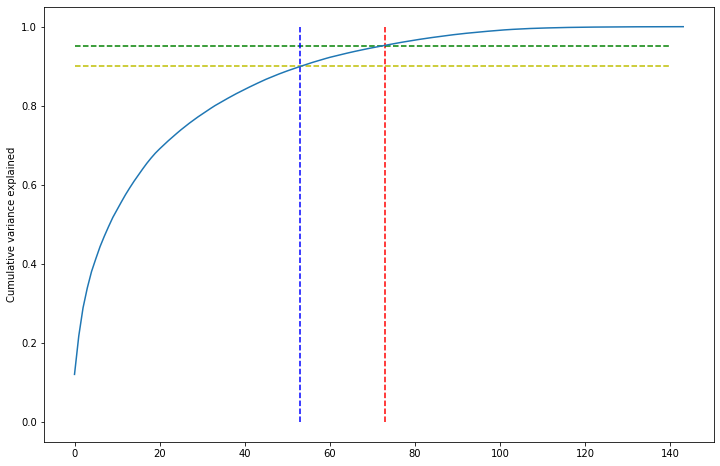

In [ ]:
# plot feature variance
# features = range(pca.n_components_)
# cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
# sns.lineplot(data=cumulative_variance,markers=20)
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=73, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=140, xmin=0, colors="g", linestyles="--")
plt.vlines(x=53, ymax=1, ymin=0, colors="b", linestyles="--")
plt.hlines(y=0.90, xmax=140, xmin=0, colors="y", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Approx 53 features explaining the 90% of data <br>
Approx 73 features explaining the 95% of data

**Let's Perform PCA over 53 features**

In [ ]:
# pricipal_components = 53
# pca_final = IncrementalPCA(n_components=53)

In [ ]:
# create pipeline
pricipal_components = 53
steps = [('scaler', StandardScaler()),
         ("pca", IncrementalPCA(n_components=pricipal_components)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [ ]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8057619047619048

In [ ]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6591 1678]
 [ 117  615]]
Sensitivity: 	0.84
Specificity: 	0.8
AUC:    	 0.89


### Hyperparameter Tuning  Using PCA and stratified folds 

In [ ]:
# Hyperparameter Tuning  Using PCA and stratified folds 
pca = PCA()
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]
pca_logistic = Pipeline(steps)
params = {'pca__n_components': [53, 73], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRe...
                                                           multi_class='warn',
       

In [ ]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8756744058287846
Best hyperparameters:  {'logistic__C': 3, 'logistic__penalty': 'l1', 'pca__n_components': 73}


In [ ]:
y_pred = model.predict(X_test)

con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)
print("Accuracy:{0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity:{0}".format(metrics.recall_score(y_test, y_pred)))

[[6956 1313]
 [ 144  588]]
Accuracy:0.8381290967670258
Sensitivity:0.8032786885245902


### ROC Curve

In [ ]:
# y_test

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

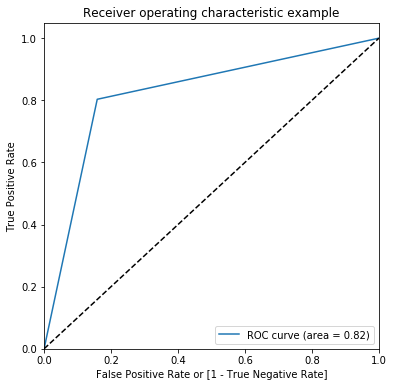

(array([0.        , 0.15878583, 1.        ]),
 array([0.        , 0.80327869, 1.        ]),
 array([2, 1, 0]))

In [ ]:
draw_roc(y_test, y_pred)

## Random Forest

In [ ]:
rf_model_1=RandomForestClassifier()
rf_model_1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model_1.predict(X_test)

print("Accuracy:{0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity:{0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy:0.9418953449616709
Sensitivity:0.4371584699453552


In [ ]:
rf_model_2 = RandomForestClassifier(criterion='gini', min_samples_leaf=700, min_samples_split=2, class_weight = 'balanced', random_state=0)
rf_model_2.fit(X_train, y_train)

y_pred = rf_model_2.predict(X_test)
print("Accuracy:{0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity:{0}".format(metrics.recall_score(y_test, y_pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:0.862681924230641
Sensitivity:0.8101092896174863


In [ ]:
# Random: Feature Importance:
feature_importance=pd.concat((pd.DataFrame(X.columns, columns = ['Variables']), pd.DataFrame(rf_model_2.feature_importances_*100, columns = ['Importance'])), axis =1).sort_values(by = 'Importance', ascending = False)
print(feature_importance)

                 Variables  Importance
136      total_amt_spent_8   16.070068
80          total_ic_mou_8   15.365894
101     last_day_rch_amt_8   13.532356
14           roam_og_mou_8   10.636500
143              arpu_diff    7.346152
133  total_rech_amt_data_8    5.485295
20        loc_og_t2m_mou_8    3.890444
110            vol_2g_mb_8    3.665431
59        loc_ic_t2m_mou_8    2.697706
142         diff_amt_spent    2.590175
132  total_rech_amt_data_7    1.627847
53          total_og_mou_8    1.579123
65            loc_ic_mou_8    1.485378
41            std_og_mou_8    1.440493
44            isd_og_mou_8    1.319360
29            loc_og_mou_8    1.088360
98          max_rech_amt_8    1.012150
95        total_rech_amt_8    0.857686
107     av_rech_amt_data_8    0.855544
55        loc_ic_t2t_mou_7    0.763632
40            std_og_mou_7    0.695205
100     last_day_rch_amt_7    0.669900
127             aug_vbc_3g    0.601312
78          total_ic_mou_6    0.483606
62        loc_ic_t2f_mou_

In [ ]:
# extract top 'n' features
top_n = 20
top_features = feature_importance["Variables"][0:top_n]
top_features_array=top_features.values

### Manual feature selection out of important features using Logistic Regression 

In [ ]:
X_train_top=X_train[top_features_array]
X_test_top=X_test[top_features_array]

In [ ]:

# Logistic regression model
lg_stats = sm.GLM(y_train,(sm.add_constant(X_train_top)), family = sm.families.Binomial())
lg_stats.fit().summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20979
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3776.6
Date:                Mon, 16 Dec 2019   Deviance:                       7553.1
Time:                        16:43:53   Pearson chi2:                 5.34e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.8230      0.075    -24.288      0.000      -1.970      -1.676
total_amt_spent_8         0.0005      0.000      1.601      0.109      -0.000       0.001
total_ic_mou_8           -0.0022      0.001     -4.002      0.000      -0.003      -0.001
last_day_rch_amt_8       -0.0048      0.001     -9.340      0.000      -0.006      -0.004
roam_og_mou_8             0.0043      0.000      8.740      0.000       0.003       0.005
arpu_diff                -0.0015      0.000    -10.548      0.000      -0.002      -0.001
total_rech_amt_data_8    -0.0003      0.000     -1.061      0.289      -0.001       0.000
loc_og_t2m_mou_8         -0.0016      0.001     -2.079      0.038      -0.003   -9.43e-05
vol_2g_mb_8              -0.0014      0.000     -4.793      0.000      -0.002      -0.001
loc_ic_t2m_mou_8          0.0019      0.001      1.354      0.176      -0.001       0.005
diff_amt_spent            0.0003   7.28e-05      3.637      0.000       0.000       0.000
total_rech_amt_data_7    -0.0002   6.86e-05     -2.367      0.018      -0.000   -2.79e-05
total_og_mou_8           -0.0058      0.000    -16.797      0.000      -0.006      -0.005
loc_ic_mou_8             -0.0035      0.001     -2.906      0.004      -0.006      -0.001
std_og_mou_8              0.0054      0.000     16.616      0.000       0.005       0.006
isd_og_mou_8              0.0108      0.004      2.856      0.004       0.003       0.018
loc_og_mou_8              0.0049      0.001      8.147      0.000       0.004       0.006
max_rech_amt_8            0.0011      0.000      2.730      0.006       0.000       0.002
total_rech_amt_8      -9.268e-05      0.000     -0.252      0.801      -0.001       0.001
av_rech_amt_data_8       -0.0050      0.001     -9.141      0.000      -0.006      -0.004
loc_ic_t2t_mou_7          0.0028      0.001      4.506      0.000       0.002       0.004
=========================================================================================
"""

In [ ]:
def vif():
  vif = pd.DataFrame()
  vif['Features'] = top_features_array
  vif['VIF'] = [variance_inflation_factor(X_train_top[top_features_array].values, i) for i in range(X_train_top[top_features_array].shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)

In [ ]:
vif()

total_amt_spent_8 has very large VIF and p value so dropping the column

In [ ]:
X_train_top=X_train_top.drop(['total_amt_spent_8'],axis=1)


In [ ]:
type(top_features_array)
index = np.argwhere(top_features_array=='total_amt_spent_8')
top_features_array = np.delete(top_features_array, index)

In [ ]:
vif()

                 Features    VIF
10         total_og_mou_8  37.28
11           loc_ic_mou_8  28.02
14           loc_og_mou_8  19.97
12           std_og_mou_8  18.87
7        loc_ic_t2m_mou_8  14.72
16       total_rech_amt_8  10.69
0          total_ic_mou_8  10.36
5        loc_og_t2m_mou_8   9.20
4   total_rech_amt_data_8   8.17
15         max_rech_amt_8   5.40
8          diff_amt_spent   4.99
9   total_rech_amt_data_7   4.87
17     av_rech_amt_data_8   4.51
18       loc_ic_t2t_mou_7   3.41
1      last_day_rch_amt_8   2.88
3               arpu_diff   2.03
6             vol_2g_mb_8   1.29
2           roam_og_mou_8   1.25
13           isd_og_mou_8   1.13


total_og_mou_8 is also have very high vif removing it

In [ ]:
X_train_top=X_train_top.drop(['total_og_mou_8'],axis=1)
index = np.argwhere(top_features_array=='total_og_mou_8')
top_features_array = np.delete(top_features_array, index)
vif()

                 Features    VIF
10           loc_ic_mou_8  26.63
7        loc_ic_t2m_mou_8  14.69
15       total_rech_amt_8   9.94
0          total_ic_mou_8   9.50
5        loc_og_t2m_mou_8   8.78
13           loc_og_mou_8   8.72
4   total_rech_amt_data_8   8.17
14         max_rech_amt_8   5.38
8          diff_amt_spent   4.99
9   total_rech_amt_data_7   4.87
16     av_rech_amt_data_8   4.44
17       loc_ic_t2t_mou_7   3.41
1      last_day_rch_amt_8   2.87
11           std_og_mou_8   2.52
3               arpu_diff   2.00
6             vol_2g_mb_8   1.29
2           roam_og_mou_8   1.22
12           isd_og_mou_8   1.13


In [ ]:
X_train_top=X_train_top.drop(['loc_ic_mou_8'],axis=1)
index = np.argwhere(top_features_array=='loc_ic_mou_8')
top_features_array = np.delete(top_features_array, index)
vif()

                 Features   VIF
14       total_rech_amt_8  9.86
5        loc_og_t2m_mou_8  8.67
12           loc_og_mou_8  8.43
4   total_rech_amt_data_8  8.17
0          total_ic_mou_8  6.98
7        loc_ic_t2m_mou_8  6.39
13         max_rech_amt_8  5.38
8          diff_amt_spent  4.99
9   total_rech_amt_data_7  4.87
15     av_rech_amt_data_8  4.43
1      last_day_rch_amt_8  2.87
10           std_og_mou_8  2.52
16       loc_ic_t2t_mou_7  2.33
3               arpu_diff  2.00
6             vol_2g_mb_8  1.29
2           roam_og_mou_8  1.22
11           isd_og_mou_8  1.13


In [ ]:
X_train_top=X_train_top.drop(['total_rech_amt_8'],axis=1)
index = np.argwhere(top_features_array=='total_rech_amt_8')
top_features_array = np.delete(top_features_array, index)
vif()

                 Features   VIF
5        loc_og_t2m_mou_8  8.55
4   total_rech_amt_data_8  8.16
12           loc_og_mou_8  8.12
0          total_ic_mou_8  6.92
7        loc_ic_t2m_mou_8  6.39
8          diff_amt_spent  4.87
9   total_rech_amt_data_7  4.78
13         max_rech_amt_8  4.68
14     av_rech_amt_data_8  4.37
1      last_day_rch_amt_8  2.83
15       loc_ic_t2t_mou_7  2.33
3               arpu_diff  1.95
6             vol_2g_mb_8  1.29
10           std_og_mou_8  1.29
2           roam_og_mou_8  1.10
11           isd_og_mou_8  1.04


In [ ]:
X_train_top=X_train_top.drop(['loc_og_t2m_mou_8'],axis=1)
index = np.argwhere(top_features_array=='loc_og_t2m_mou_8')
top_features_array = np.delete(top_features_array, index)
vif()

                 Features   VIF
4   total_rech_amt_data_8  8.16
0          total_ic_mou_8  6.88
6        loc_ic_t2m_mou_8  5.68
7          diff_amt_spent  4.87
8   total_rech_amt_data_7  4.78
12         max_rech_amt_8  4.67
13     av_rech_amt_data_8  4.37
1      last_day_rch_amt_8  2.83
11           loc_og_mou_8  2.73
14       loc_ic_t2t_mou_7  2.23
3               arpu_diff  1.95
5             vol_2g_mb_8  1.29
9            std_og_mou_8  1.28
2           roam_og_mou_8  1.10
10           isd_og_mou_8  1.04


In [ ]:
X_train_top=X_train_top.drop(['total_rech_amt_data_8'],axis=1)
index = np.argwhere(top_features_array=='total_rech_amt_data_8')
top_features_array = np.delete(top_features_array, index)
vif()

                 Features   VIF
0          total_ic_mou_8  6.88
5        loc_ic_t2m_mou_8  5.67
11         max_rech_amt_8  4.56
12     av_rech_amt_data_8  3.31
1      last_day_rch_amt_8  2.82
10           loc_og_mou_8  2.73
13       loc_ic_t2t_mou_7  2.23
7   total_rech_amt_data_7  2.05
6          diff_amt_spent  1.99
3               arpu_diff  1.55
4             vol_2g_mb_8  1.29
8            std_og_mou_8  1.27
2           roam_og_mou_8  1.10
9            isd_og_mou_8  1.04


In [ ]:
X_train_top=X_train_top.drop(['loc_ic_t2m_mou_8'],axis=1)
index = np.argwhere(top_features_array=='loc_ic_t2m_mou_8')
top_features_array = np.delete(top_features_array, index)
vif()

                 Features   VIF
10         max_rech_amt_8  4.55
11     av_rech_amt_data_8  3.30
0          total_ic_mou_8  3.11
1      last_day_rch_amt_8  2.82
9            loc_og_mou_8  2.38
12       loc_ic_t2t_mou_7  2.07
6   total_rech_amt_data_7  2.05
5          diff_amt_spent  1.99
3               arpu_diff  1.54
4             vol_2g_mb_8  1.29
7            std_og_mou_8  1.27
2           roam_og_mou_8  1.10
8            isd_og_mou_8  1.04


In [ ]:
lg_stats = sm.GLM(y_train,(sm.add_constant(X_train_top)), family = sm.families.Binomial())
lg_stats.fit().summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4075.7
Date:                Mon, 16 Dec 2019   Deviance:                       8151.4
Time:                        17:00:57   Pearson chi2:                 3.55e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.6094      0.069    -23.201      0.000      -1.745      -1.473
total_ic_mou_8           -0.0073      0.000    -20.413      0.000      -0.008      -0.007
last_day_rch_amt_8       -0.0056      0.001    -10.104      0.000      -0.007      -0.004
roam_og_mou_8             0.0052      0.000     12.347      0.000       0.004       0.006
arpu_diff                -0.0018      0.000    -13.891      0.000      -0.002      -0.002
vol_2g_mb_8              -0.0017      0.000     -5.710      0.000      -0.002      -0.001
diff_amt_spent            0.0003   6.05e-05      5.393      0.000       0.000       0.000
total_rech_amt_data_7    -0.0002   5.68e-05     -2.894      0.004      -0.000    -5.3e-05
std_og_mou_8           5.973e-05   7.52e-05      0.794      0.427   -8.77e-05       0.000
isd_og_mou_8              0.0164      0.003      5.696      0.000       0.011       0.022
loc_og_mou_8              0.0008      0.000      5.221      0.000       0.001       0.001
max_rech_amt_8           -0.0002      0.000     -0.422      0.673      -0.001       0.001
av_rech_amt_data_8       -0.0029      0.000     -6.438      0.000      -0.004      -0.002
loc_ic_t2t_mou_7          0.0031      0.001      5.904      0.000       0.002       0.004
=========================================================================================
"""

In [ ]:
X_train_top=X_train_top.drop(['max_rech_amt_8'],axis=1)
index = np.argwhere(top_features_array=='max_rech_amt_8')
top_features_array = np.delete(top_features_array, index)
vif()

                 Features   VIF
0          total_ic_mou_8  3.05
10     av_rech_amt_data_8  2.81
9            loc_og_mou_8  2.29
11       loc_ic_t2t_mou_7  2.07
6   total_rech_amt_data_7  2.03
5          diff_amt_spent  1.96
1      last_day_rch_amt_8  1.86
3               arpu_diff  1.54
4             vol_2g_mb_8  1.29
7            std_og_mou_8  1.21
2           roam_og_mou_8  1.06
8            isd_og_mou_8  1.02


In [ ]:
lg_stats = sm.GLM(y_train,(sm.add_constant(X_train_top)), family = sm.families.Binomial())
lg_stats.fit().summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4075.8
Date:                Mon, 16 Dec 2019   Deviance:                       8151.5
Time:                        17:01:58   Pearson chi2:                 3.71e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.6139      0.069    -23.556      0.000      -1.748      -1.480
total_ic_mou_8           -0.0074      0.000    -20.970      0.000      -0.008      -0.007
last_day_rch_amt_8       -0.0056      0.001    -10.881      0.000      -0.007      -0.005
roam_og_mou_8             0.0052      0.000     12.652      0.000       0.004       0.006
arpu_diff                -0.0018      0.000    -13.906      0.000      -0.002      -0.002
vol_2g_mb_8              -0.0017      0.000     -5.703      0.000      -0.002      -0.001
diff_amt_spent            0.0003   6.05e-05      5.398      0.000       0.000       0.000
total_rech_amt_data_7    -0.0002   5.68e-05     -2.879      0.004      -0.000   -5.22e-05
std_og_mou_8           5.446e-05   7.42e-05      0.734      0.463   -9.09e-05       0.000
isd_og_mou_8              0.0163      0.003      5.689      0.000       0.011       0.022
loc_og_mou_8              0.0008      0.000      5.207      0.000       0.001       0.001
av_rech_amt_data_8       -0.0029      0.000     -6.976      0.000      -0.004      -0.002
loc_ic_t2t_mou_7          0.0031      0.001      5.915      0.000       0.002       0.004
=========================================================================================
"""

In [ ]:
X_train_top=X_train_top.drop(['std_og_mou_8'],axis=1)
index = np.argwhere(top_features_array=='std_og_mou_8')
top_features_array = np.delete(top_features_array, index)
vif()

                 Features   VIF
0          total_ic_mou_8  3.00
9      av_rech_amt_data_8  2.79
8            loc_og_mou_8  2.29
10       loc_ic_t2t_mou_7  2.07
6   total_rech_amt_data_7  2.02
5          diff_amt_spent  1.96
1      last_day_rch_amt_8  1.78
3               arpu_diff  1.52
4             vol_2g_mb_8  1.29
2           roam_og_mou_8  1.05
7            isd_og_mou_8  1.02


In [ ]:
lg_stats = sm.GLM(y_train,(sm.add_constant(X_train_top)), family = sm.families.Binomial())
lg_stats.fit().summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4076.0
Date:                Mon, 16 Dec 2019   Deviance:                       8152.1
Time:                        17:03:09   Pearson chi2:                 3.82e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.5911      0.061    -26.078      0.000      -1.711      -1.472
total_ic_mou_8           -0.0073      0.000    -20.974      0.000      -0.008      -0.007
last_day_rch_amt_8       -0.0056      0.001    -10.895      0.000      -0.007      -0.005
roam_og_mou_8             0.0051      0.000     12.636      0.000       0.004       0.006
arpu_diff                -0.0018      0.000    -14.005      0.000      -0.002      -0.002
vol_2g_mb_8              -0.0017      0.000     -5.744      0.000      -0.002      -0.001
diff_amt_spent            0.0003   6.04e-05      5.365      0.000       0.000       0.000
total_rech_amt_data_7    -0.0002   5.67e-05     -2.907      0.004      -0.000   -5.38e-05
isd_og_mou_8              0.0161      0.003      5.668      0.000       0.011       0.022
loc_og_mou_8              0.0008      0.000      5.185      0.000       0.001       0.001
av_rech_amt_data_8       -0.0030      0.000     -7.191      0.000      -0.004      -0.002
loc_ic_t2t_mou_7          0.0031      0.001      5.897      0.000       0.002       0.004
=========================================================================================
"""

### Test obtained top features based on logistic regression and the hyper parameters we recived from earlier test

**Using results from Hyperparameter Tuning Using PCA and stratified folds**
<br>
Best_Hyperparameters={'logistic__C': 3, 'logistic__penalty': 'l1', 'pca__n_components': 73}

In [ ]:
best_hyperparameters={'logistic__C': [3], 'logistic__penalty': ['l1']}
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight="balanced"))
logistic = Pipeline(steps)
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
model_top = GridSearchCV(estimator=logistic, cv=folds, param_grid=best_hyperparameters, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
model_top.fit(X_train_top, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=1

In [ ]:

# print best hyperparameters
print("Best AUC: ", model_top.best_score_)
print("Best hyperparameters: ", model_top.best_params_)

Best AUC:  0.8776246126128979
Best hyperparameters:  {'logistic__C': 3, 'logistic__penalty': 'l1'}


In [ ]:
X_test_top=X_test[top_features_array]

In [ ]:
# predict churn on test data
y_pred = model.predict(X_test_top)

con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)
print("Accuracy:{0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity:{0}".format(metrics.recall_score(y_test, y_pred)))

[[6953 1316]
 [ 143  589]]
Accuracy:0.8379068992334185
Sensitivity:0.8046448087431693


**So Final model is with <br>
Accuracy: 0.8379068992334185<br>
Sensitivity: 0.8046448087431693**



In [ ]:
print("Final important features:")
print()
for feature in top_features_array:
  print(feature)

Final important features:

total_ic_mou_8
last_day_rch_amt_8
roam_og_mou_8
arpu_diff
vol_2g_mb_8
diff_amt_spent
total_rech_amt_data_7
isd_og_mou_8
loc_og_mou_8
av_rech_amt_data_8
loc_ic_t2t_mou_7


# **Recomendations**

## From GLM model for top features

In [ ]:
glm_model=lg_stats.fit()

In [ ]:
glm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4076.0
Date:                Mon, 16 Dec 2019   Deviance:                       8152.1
Time:                        17:30:14   Pearson chi2:                 3.82e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.5911      0.061    -26.078      0.000      -1.711      -1.472
total_ic_mou_8           -0.0073      0.000    -20.974      0.000      -0.008      -0.007
last_day_rch_amt_8       -0.0056      0.001    -10.895      0.000      -0.007      -0.005
roam_og_mou_8             0.0051      0.000     12.636      0.000       0.004       0.006
arpu_diff                -0.0018      0.000    -14.005      0.000      -0.002      -0.002
vol_2g_mb_8              -0.0017      0.000     -5.744      0.000      -0.002      -0.001
diff_amt_spent            0.0003   6.04e-05      5.365      0.000       0.000       0.000
total_rech_amt_data_7    -0.0002   5.67e-05     -2.907      0.004      -0.000   -5.38e-05
isd_og_mou_8              0.0161      0.003      5.668      0.000       0.011       0.022
loc_og_mou_8              0.0008      0.000      5.185      0.000       0.001       0.001
av_rech_amt_data_8       -0.0030      0.000     -7.191      0.000      -0.004      -0.002
loc_ic_t2t_mou_7          0.0031      0.001      5.897      0.000       0.002       0.004
=========================================================================================
"""

**Based on buisness understanding here are top 3 features**


1.   Drop of total incoming calls in month 8
2.   Difference in average amount spent in month 8
3.   Difference in average revenue between 6-7 month and 8th month



**1. Telecom operator needs to look for the users those incoming call suddenly dropping, from analysis it seems user might have started using other network and started receiving calls on the same. Operator must start providing marketing calls to such customers**

**2. The common pattern is clearly visible here - difference in average revenue per user, total rech amount for both calls and data is dropping, operator needs take care of network quality and competitive prices**

**3. On postive side**
- Difference between average amount spent in 6-7 month and 8th month is +ve.
- ISD outgoing and local outgoing is showing +ve trend

**Operator needs to focus more and bring variance in products / packages**